# &#x1F4D1; &nbsp; $\mathfrak {\color{#348ABD} {P4: \ Train \ a \ Smartcab \ to \ Drive}}$
---

---

## $\mathfrak {\color{#348ABD} {1. \ Project \ Overview}}$
In this project, we will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

---

---
## $\mathfrak {\color{#348ABD} {2.\ Code \ Library \ and \ Links}}$

In [1]:
from IPython.core.display import HTML, Image

hide_code = ''
HTML('''<script> code_show = true;

function code_display() {
    if (code_show) {
        $('div.input').each(function(id) {if (id == 0 || $(this).html().indexOf('hide_code') > -1) {$(this).hide();}
        });
        $('div.output_prompt').css('opacity', 0);
    } else { 
        $('div.input').each(function(id) {$(this).show();});
        $('div.output_prompt').css('opacity', 1);
    }
    code_show = !code_show; }

$(document).ready(code_display);</script>
<form action="javascript: code_display()">
<input style="color: #348ABD; background: ghostwhite; opacity: 0.9;"
type="submit" value="Click to display or hide code"></form>''')

In [2]:
hide_code
# Import the visualization code
import visuals as vs
# Display for notebooks
%matplotlib inline

- PyGame: https://www.pygame.org/wiki/GettingStarted
- Program Arcade Games With Python And Pygame: http://programarcadegames.com/index.php?lang=en

---

---
## $\mathfrak {\color{#348ABD} {3.\ Understand\ Components}}$
### 3.1 Understand the World
Before starting to work on implementing the driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, we simply run the `agent.py`. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

In [17]:
hide_code
!python smartcab/agent.py

''

The output of this code cell is in the file '3-1.txt'

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  
---
### Answer 1
- &#x1F58C; &nbsp; **Description.**
  - The Smartcab operates in a grid world with road directions 'North-South' and 'East-West'.
  - There are many vehicles on the roads, but no pedestrians. 
  - In this world traffic lights are situated at each intersection, they can be in one of two states: 'North-South open' or 'East-West open'.
  - US right-of-way rules:
    - The light is green. 
      - The agent can choose the action of moving forward or turning right.
      - If it wants to turn left, 
      but there is an oncoming car that is moving forward: the other car has the right of way. 
      - If there is no car oncoming, the learning agent may turn left.
    - The light is red.
     - The agent should not take the action of moving forward or turning left. 
     - It could turn right, but only if there is no car on the left, 
     or if there is a car on the left but it is not moving forward.


- &#x1F695; &nbsp; **Game options.**
  - *Light:* red, green.
  - *Oncoming:* forward, left, right, None.
  - *Left:* forward, left, right, None.
  - *Action:* take the next waypoint, None.
  - *Next waypoint:* forward, left, right.


- &#x1F4B0; &nbsp; **Rewards.**
  - *Large reward:* a completed trip.
  - *Small reward:* a correct move executed at an intersection.
  - *Small penalty:* an incorrect move.
  - *Large penalty:* violating traffic rules and/or an accident.


- &#x1F440; &nbsp; **The Beginning Observation.**  
  - The Smartcab did not move at all during the training trials.
  - The agent receives either a positive or negative reward depending on whether it took an appropriate action: 
    - negative (wrong), 
    - positive (correct).  
  - The received reward becomes greater if the Smartcab does the correct action after the previous correct one.
  - The light color affects the reward: the agent receives a positive reward if it idles in front of red lights, and conversely receives a negative reward if it idles in front of green lights.

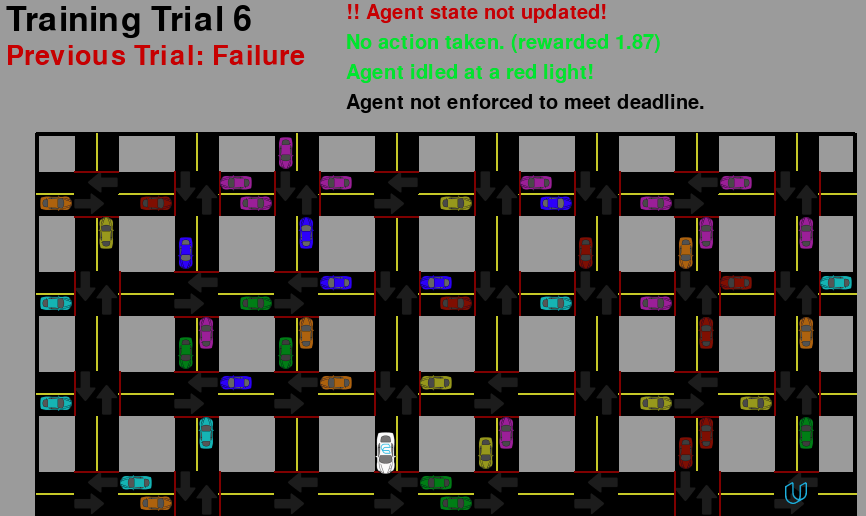

In [14]:
hide_code
Image(filename='P4_01.png')

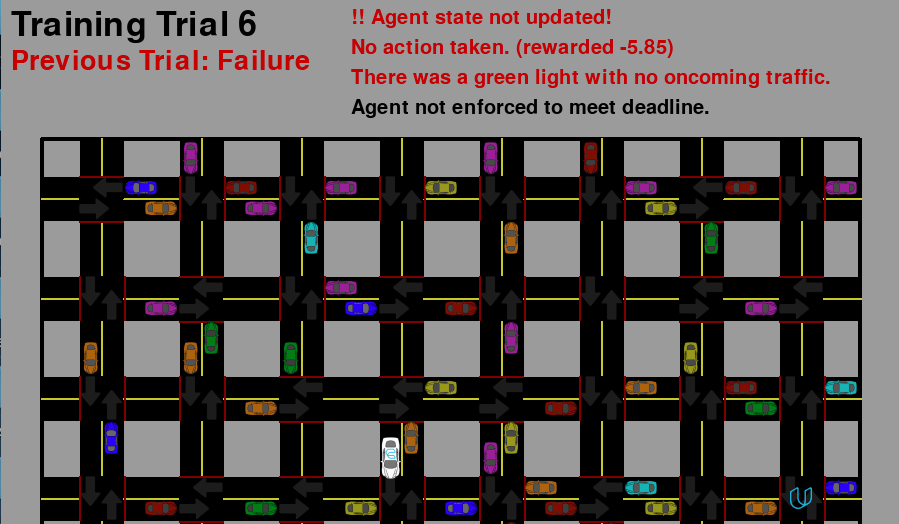

In [15]:
hide_code
Image(filename='P4_02.png')

### 3.2 Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()'`* function consider the North-South or East-West direction first?*
---
### Answer 2
- In the `agent.py`:
  - *`'optimized'`* changes the default log file name;
  - *`'update_delay'`* sets up the continuous time (in seconds) between actions, default = 2.0 seconds;
  - *`'n_test'`* regulates the number of trials.


- In the `environment.py` the *`'act(self, agent, action)'`* is called when an agent performs actions.


- In the `simulator.py` the difference between the *`'render_text()'`* function and the *`'render()'`* function is: 
  - the non-GUI render display in the terminal (*`'render_text()'`*) or the GUI render display (*`'render()'`*)


- In the `planner.py` the *`'next_waypoint()'`* function considers the East-West direction first.

---

---
## $\mathfrak {\color{#348ABD} {4.\ Implement \ a \ Basic \ Driving \ Agent}}$

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### 4.1 Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the `agent.py` file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.

In [26]:
hide_code
# changes in 'agent.py'
'''
def run():
    """ Driving function for running the simulation. 
        Press ESC to close the simulation, or [SPACE] to pause the simulation. """

    ##############
    # Create the environment
    # Flags:
    #   verbose     - set to True to display additional output from the simulation
    #   num_dummies - discrete number of dummy agents in the environment, default is 100
    #   grid_size   - discrete number of intersections (columns, rows), default is (8, 6)
    env = Environment()
    
    ##############
    # Create the driving agent
    # Flags:
    #   learning   - set to True to force the driving agent to use Q-learning
    #    * epsilon - continuous value for the exploration factor, default is 1
    #    * alpha   - continuous value for the learning rate, default is 0.5
    agent = env.create_agent(LearningAgent)
    
    ##############
    # Follow the driving agent
    # Flags:
    #   enforce_deadline - set to True to enforce a deadline metric
    env.set_primary_agent(agent, enforce_deadline=True) #(!)

    ##############
    # Create the simulation
    # Flags:
    #   update_delay - continuous time (in seconds) between actions, default is 2.0 seconds
    #   display      - set to False to disable the GUI if PyGame is enabled
    #   log_metrics  - set to True to log trial and simulation results to /logs
    #   optimized    - set to True to change the default log file name
    sim = Simulator(env, update_delay=0.01, log_metrics=True) #(!)
    
    ##############
    # Run the simulator
    # Flags:
    #   tolerance  - epsilon tolerance before beginning testing, default is 0.05 
    #   n_test     - discrete number of testing trials to perform, default is 0
    sim.run(n_test=10) #(!)
'''
''''''

''

In [22]:
hide_code
!python smartcab/agent.py

''

The output of this code cell is in the file '4-1.txt'

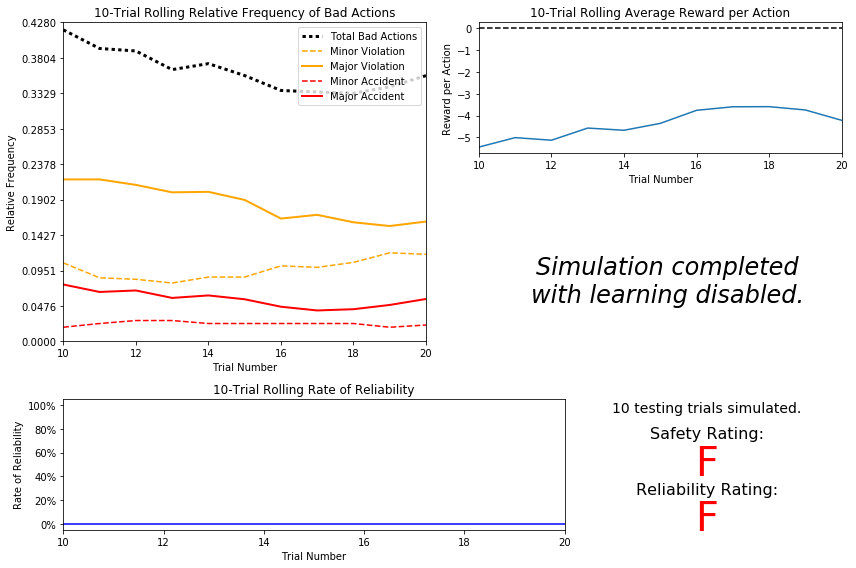

In [19]:
hide_code
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

---
### Answer 3
- Bad decisions (according to the "10-trial rolling relative frequency of bad actions" visualization):
  - the agent made bad decisions in approximately 33-43% percents of cases;
  - those bad decisions in about 1/4 of cases result in accidents.
  
  
- The Smartcab has chosen actions randomly between four variants (each of them can be good or bad depending on the situation on the road)  so this rate of the reliability make some sense.


- The "10-trial rolling average rewarding action" plot displays that on average the agent receives a negative reward between -5.5 and -3.5. It shows that the Smartcab has been penalized many times.


- According to the "10-trial rolling rate of reliability" plot, the results are always equal to 0% so no trail was completed successfully and the outcome did not change at all.


- The Smartcab cannot be considered safe and reliable for its passengers: the safety rating and reliability rating are equal to "F". This fact indicates that the agent caused at least one major accident per run (the `'calculate_safety()'` function in `visuals.py`) and failed to reach the destination on time for at least 60% of trips (the `'calculate_reliability()'` function in `visuals.py`).

---

---
## $\mathfrak {\color{#348ABD} {5.\ Inform \ the \ Driving \ Agent}}$
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### 5.1 Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

---
### Answer 4

- Waypoint: this parameter regulates the driving with the values [one block straight ahead, one block left, one block right, none]; it helps the agent to find out the next step towards the goal, this action can be optimal if there were no other constraints; so it captures efficiency.
- Traffic lights: this parameter with values [green, red] related to the environment, it needs to be included in states for the agent to learn traffic rules,  rewards, and as a result, safe driving.
- Cars at intersections (oncoming and from the left side): this parameter is related to the environment, and includes the direction of other cars at the intersection; it helps the agent to learn how it should react when a different agent behaves in a certain way at the intersection (according to the traffic rules); of course, it's important for safety as well.
- I have not included the deadline feature because I think on this stage, it does not consist the information needed to find the optimal way. Certainly, it does not affect safety.
- I did not use the information about cars at intersections from the right side because it does not affect the agent moves.

### 5.2 Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state of a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

---
### Answer 5  

The feature 'waypoint' can be one of three values: 'right', 'forward', 'left';  the value 'none' could be only in the case when the agent has reached its destination. Other features 'light', 'oncoming', 'left' has 2, 4, 4 possible values respectively. 

The number of possible combinations is equal to: 3 x 2 x 4 x 4 = 96

### 5.3 Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

In [24]:
hide_code
# changes in 'agent.py'
'''
def build_state(self):
    """ The build_state function is called when the agent requests data from the 
        environment. The next waypoint, the intersection inputs, and the deadline 
        are all features available to the agent. """

    # Collect data about the environment  
    waypoint = self.planner.next_waypoint() # The next waypoint 
    inputs = self.env.sense(self)           # Visual input - intersection light and traffic
    deadline = self.env.get_deadline(self)  # Remaining deadline
    
    ########### 
    ## TO DO ##
    ###########
        
    # NOTE : you are not allowed to engineer eatures outside of the inputs available.
    # Because the aim of this project is to teach Reinforcement Learning, we have placed 
    # constraints in order for you to learn how to adjust epsilon and alpha, 
    # and thus learn about the balance between exploration and exploitation.
    # With the hand-engineered features, this learning process gets entirely negated.
        
    # Set 'state' as a tuple of relevant data for the agent         
    state = (waypoint, inputs['light'], inputs['oncoming'], inputs['left']) #(!!!)

    return state
    
def run():
    """ Driving function for running the simulation. 
        Press ESC to close the simulation, or [SPACE] to pause the simulation. """

    ##############
    # Create the environment
    # Flags:
    #   verbose     - set to True to display additional output from the simulation
    #   num_dummies - discrete number of dummy agents in the environment, default is 100
    #   grid_size   - discrete number of intersections (columns, rows), default is (8, 6)
    env = Environment()
    
    ##############
    # Create the driving agent
    # Flags:
    #   learning   - set to True to force the driving agent to use Q-learning
    #    * epsilon - continuous value for the exploration factor, default is 1
    #    * alpha   - continuous value for the learning rate, default is 0.5
    agent = env.create_agent(LearningAgent)
    
    ##############
    # Follow the driving agent
    # Flags:
    #   enforce_deadline - set to True to enforce a deadline metric
    env.set_primary_agent(agent, enforce_deadline=True) #(!!!)

    ##############
    # Create the simulation
    # Flags:
    #   update_delay - continuous time (in seconds) between actions, default is 2.0 seconds
    #   display      - set to False to disable the GUI if PyGame is enabled
    #   log_metrics  - set to True to log trial and simulation results to /logs
    #   optimized    - set to True to change the default log file name
    sim = Simulator(env, log_metrics=True) #(!!!)
    
    ##############
    # Run the simulator
    # Flags:
    #   tolerance  - epsilon tolerance before beginning testing, default is 0.05 
    #   n_test     - discrete number of testing trials to perform, default is 0
    sim.run() #(!!!)
'''
''''''

''

In [32]:
hide_code
!python smartcab/agent.py

''

The output of this code cell is in the file '5-1.txt'

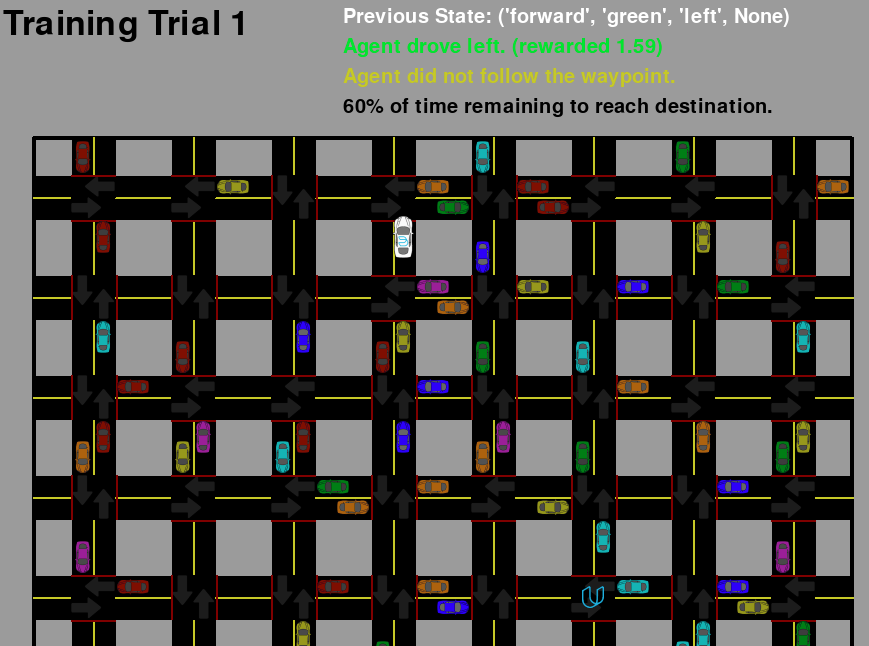

In [33]:
hide_code
Image(filename='P4_03.png')

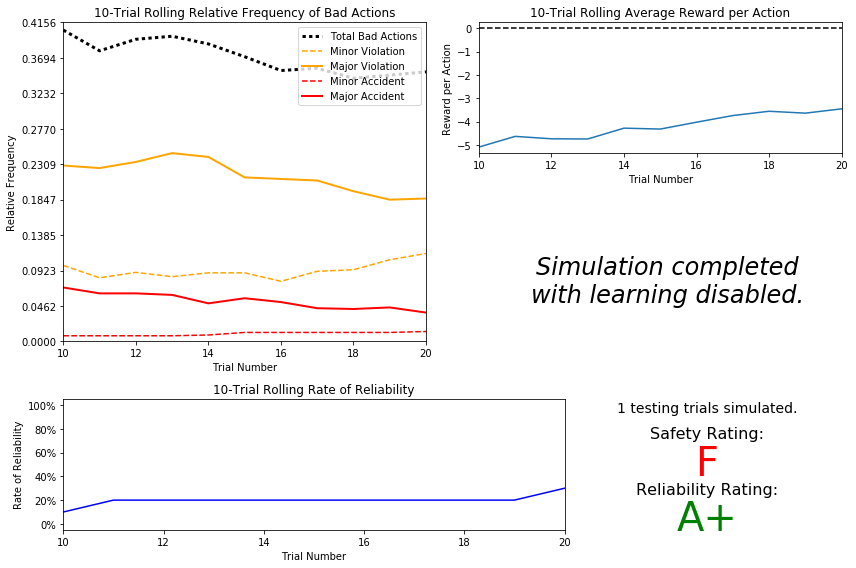

In [31]:
hide_code
# Load the 'sim_no-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_no-learning.csv')

---

---
## $\mathfrak {\color{#348ABD} {6. \ Implement \ a \ Q-Learning \ Driving \ Agent}}$
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 'action-1' : Qvalue-1, 'action-2' : Qvalue-2, ...},
  'state-2': {'action-1' : Qvalue-1, ...}, ...}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### 6.1 Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

In [ ]:
hide_code
# changes in 'agent.py'
'''
class LearningAgent(Agent):
    """ An agent that learns to drive in the Smartcab world.
        This is the object you will be modifying. """ 

    def __init__(self, env, learning=False, epsilon=1.0, alpha=0.5):
        super(LearningAgent, self).__init__(env)     # Set the agent in the evironment 
        self.planner = RoutePlanner(self.env, self)  # Create a route planner
        self.valid_actions = self.env.valid_actions  # The set of valid actions

        # Set parameters of the learning agent
        self.learning = learning # Whether the agent is expected to learn
        self.Q = dict()          # Create a Q-table which will be a dictionary of tuples
        self.epsilon = epsilon   # Random exploration factor
        self.alpha = alpha       # Learning factor

        ###########
        ## TO DO ##
        ###########
        # Set any additional class parameters as needed
        
        self.trial = 0 #(!!!)

    def reset(self, destination=None, testing=False):
        """ The reset function is called at the beginning of each trial.
            'testing' is set to True if testing trials are being used
            once training trials have completed. """

        # Select the destination as the new location to route to
        self.planner.route_to(destination)
        
        ########### 
        ## TO DO ##
        ###########
        # Update epsilon using a decay function of your choice
        # Update additional class parameters as needed
        # If 'testing' is True, set epsilon and alpha to 0
        
        #(!!!)
        
        self.trial += 1
        
        if testing:
            self.epsilon = 0
            self.alpha = 0
        else:
            # 6.1 default learning
            self.epsilon = self.epsilon - 0.05
            
        return None

    def build_state(self):
        """ The build_state function is called when the agent requests data from the 
            environment. The next waypoint, the intersection inputs, and the deadline 
            are all features available to the agent. """

        # Collect data about the environment
        waypoint = self.planner.next_waypoint() # The next waypoint 
        inputs = self.env.sense(self)           # Visual input - intersection light and traffic
        deadline = self.env.get_deadline(self)  # Remaining deadline

        ########### 
        ## TO DO ##
        ###########
        
        # NOTE : you are not allowed to engineer eatures outside of the inputs available.
        # Because the aim of this project is to teach Reinforcement Learning, we have placed 
        # constraints in order for you to learn how to adjust epsilon and alpha, 
        # and thus learn about the balance between exploration and exploitation.
        # With the hand-engineered features, this learning process gets entirely negated.
        
        # Set 'state' as a tuple of relevant data for the agent        
        state = (waypoint, inputs['light'], inputs['oncoming'], inputs['left'])
        
        self.createQ(state) #(!!!)
        
        return state


    def get_maxQ(self):
        """ The get_max_Q function is called when the agent is asked to find the
            maximum Q-value of all actions based on the 'state' the smartcab is in. """

        ########### 
        ## TO DO ##
        ###########
        # Calculate the maximum Q-value of all actions for a given state
        
        #(!!!)
        
        maxQ = 0
        actions = []

        for action in self.Q[self.state]:
            
            Qvalue = self.Q[self.state][action]
            
            if maxQ < Qvalue:
                maxQ = Qvalue
                del actions[:]
                actions.append(action)
                
            elif maxQ == Qvalue:
                actions.append(action)
        
        return maxQ, actions 


    def createQ(self, state):
        """ The createQ function is called when a state is generated by the agent. """

        ########### 
        ## TO DO ##
        ###########
        # When learning, check if the 'state' is not in the Q-table
        # If it is not, create a new dictionary for that state
        #   Then, for each action available, set the initial Q-value to 0.0
        
        #(!!!)
        
        if self.learning and state not in self.Q.keys():
            self.Q[state] = {'left':0.0, 'right':0.0, 'forward':0.0, None:0.0}

        return 


    def choose_action(self, state):
        """ The choose_action function is called when the agent is asked to choose
            which action to take, based on the 'state' the smartcab is in. """

        # Set the agent state and default action
        self.state = state
        self.next_waypoint = self.planner.next_waypoint()
#        action = random.choice(self.valid_actions)

        ########### 
        ## TO DO ##
        ###########
        # When not learning, choose a random action
        # When learning, choose a random action with 'epsilon' probability
        # Otherwise, choose an action with the highest Q-value for the current state
        # Be sure that when choosing an action with highest Q-value 
        # that you randomly select between actions that "tie".
        
        #(!!!)
        
        if self.learning:
            
            if self.epsilon > random.random():
                action = random.choice(self.valid_actions)
            else:
                action = random.choice(self.get_maxQ()[1])
                
        else:
            action = random.choice(self.valid_actions)
        
        return action


    def learn(self, state, action, reward):
        """ The learn function is called after the agent completes an action and
            receives a reward. This function does not consider future rewards 
            when conducting learning. """

        ########### 
        ## TO DO ##
        ###########
        # When learning, implement the value iteration update rule
        #   Use only the learning rate 'alpha' (do not use the discount factor 'gamma')
        
        #(!!!)
        if self.learning:
            self.Q[self.state][action] = (1 - self.alpha) * self.Q[self.state][action] + self.alpha * reward
            
        return 


    def update(self):
        """ The update function is called when a time step is completed in the 
            environment for a given trial. This function will build the agent
            state, choose an action, receive a reward, and learn if enabled. """

        state = self.build_state()          # Get current state
        self.createQ(state)                 # Create 'state' in Q-table
        action = self.choose_action(state)  # Choose an action
        reward = self.env.act(self, action) # Receive a reward
        self.learn(state, action, reward)   # Q-learn

        return 
        

def run():
    """ Driving function for running the simulation. 
        Press ESC to close the simulation, or [SPACE] to pause the simulation. """

    ##############
    # Create the environment
    # Flags:
    #   verbose     - set to True to display additional output from the simulation
    #   num_dummies - discrete number of dummy agents in the environment, default is 100
    #   grid_size   - discrete number of intersections (columns, rows), default is (8, 6)
    env = Environment()
    
    ##############
    # Create the driving agent
    # Flags:
    #   learning   - set to True to force the driving agent to use Q-learning
    #    * epsilon - continuous value for the exploration factor, default is 1
    #    * alpha   - continuous value for the learning rate, default is 0.5
    agent = env.create_agent(LearningAgent, learning=True) #(!!!)
    
    ##############
    # Follow the driving agent
    # Flags:
    #   enforce_deadline - set to True to enforce a deadline metric
    env.set_primary_agent(agent, enforce_deadline=True) #(!!!)

    ##############
    # Create the simulation
    # Flags:
    #   update_delay - continuous time (in seconds) between actions, default is 2.0 seconds
    #   display      - set to False to disable the GUI if PyGame is enabled
    #   log_metrics  - set to True to log trial and simulation results to /logs
    #   optimized    - set to True to change the default log file name
    sim = Simulator(env, update_delay=0.1, log_metrics=True) #(!!!)
    
    ##############
    # Run the simulator
    # Flags:
    #   tolerance  - epsilon tolerance before beginning testing, default is 0.05 
    #   n_test     - discrete number of testing trials to perform, default is 0
    sim.run(n_test=10) #(!!!)
'''
''''''

In [14]:
hide_code
!python smartcab/agent.py

''

The output of this code cell is in the file '6-1.txt'

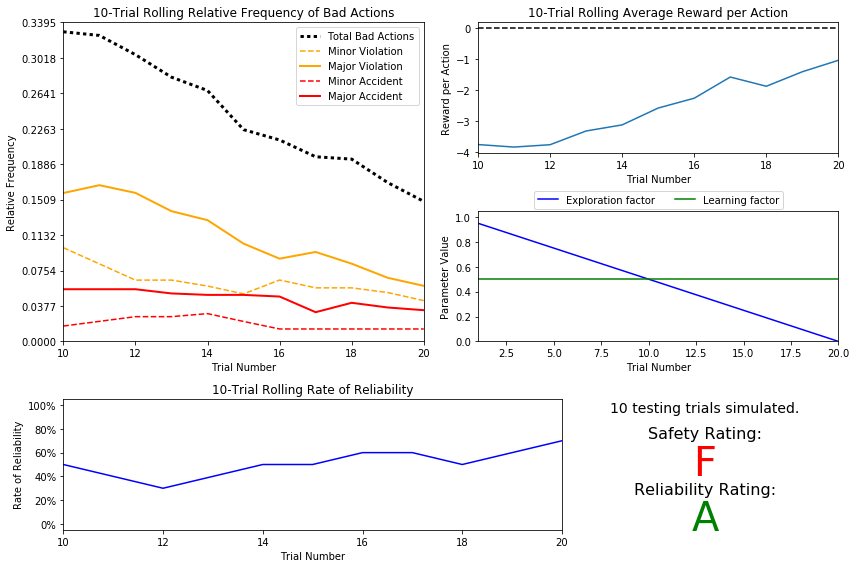

In [11]:
hide_code
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar to the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

---
### Answer 6
- Comparing observations: the most of the observations have a significant difference.
  - The safety rating is equal to "F" for the basic driving agent and the default Q-Learning agent, but the reliability rating has a huge difference: "F" - for the basic driving agent and "A" - for the default Q-Learning agent.
  - In the second case, we could see a decrease of bad actions and increase of rewards, and there is no progress in these spheres in the first case.
  

- In our code, the default $\epsilon$ tolerance is equal to 0.05, and the exploration factor is reduced by 0.05 on every training step. It corresponds to the 20 training trials performed by the agent: 1 / 0.05 = 20.


- In the second diagram on the right-hand side, we can see a plot of parameter values. The exploration factor is represented by the straight line and decreases at a constant rate according to the given decaying function.


- With increasing the number of training trials in the case of the default Q-Learning agent, the number of bad actions was significantly decreasing to the level about 15% and the average reward was improved but did not become positive in the end.


- For the default Q-Learning agent the reliability had really improved till the grade of "A" and it indicates the effective learning the move rules in the grid space. The safety rating is still equal to "F", but the frequency of bad actions had fallen.

---

---
## $\mathfrak {\color{#348ABD} {7. \ Improve \ the \ Q-Learning \ Driving \ Agent}}$
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### 7.1 Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

In [3]:
hide_code
# changes in 'agent.py'
'''
def run():
    """ Driving function for running the simulation. 
        Press ESC to close the simulation, or [SPACE] to pause the simulation. """

    ##############
    # Create the environment
    # Flags:
    #   verbose     - set to True to display additional output from the simulation
    #   num_dummies - discrete number of dummy agents in the environment, default is 100
    #   grid_size   - discrete number of intersections (columns, rows), default is (8, 6)
    env = Environment()
    
    ##############
    # Create the driving agent
    # Flags:
    #   learning   - set to True to force the driving agent to use Q-learning
    #    * epsilon - continuous value for the exploration factor, default is 1
    #    * alpha   - continuous value for the learning rate, default is 0.5
    agent = env.create_agent(LearningAgent, learning=True, epsilon=5, alpha=0.1) #(!!!)
    
    ##############
    # Follow the driving agent
    # Flags:
    #   enforce_deadline - set to True to enforce a deadline metric
    env.set_primary_agent(agent, enforce_deadline=True)

    ##############
    # Create the simulation
    # Flags:
    #   update_delay - continuous time (in seconds) between actions, default is 2.0 seconds
    #   display      - set to False to disable the GUI if PyGame is enabled
    #   log_metrics  - set to True to log trial and simulation results to /logs
    #   optimized    - set to True to change the default log file name
    sim = Simulator(env, update_delay=0.1, log_metrics=True, optimized=True) #(!!!)
    
    ##############
    # Run the simulator
    # Flags:
    #   tolerance  - epsilon tolerance before beginning testing, default is 0.05 
    #   n_test     - discrete number of testing trials to perform, default is 0
    sim.run(n_test=20, tolerance=0.01) #(!!!)
'''
''''''

''

In [18]:
hide_code
# !python smartcab/agent.py

''

The output of this code cell is in the file '7-1.txt'

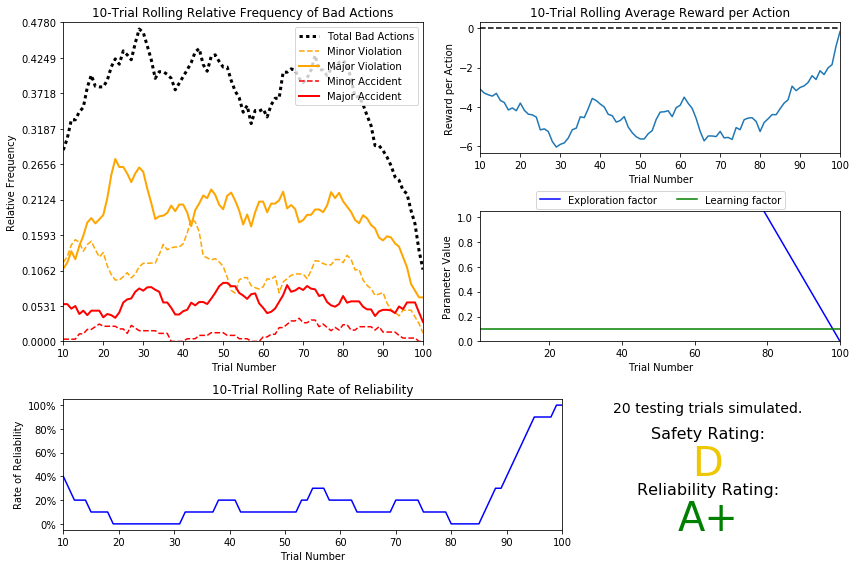

In [13]:
hide_code
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
# epsilon=5, alpha=0.1, tolerance=0.01
vs.plot_trials('sim_improved-learning.csv')

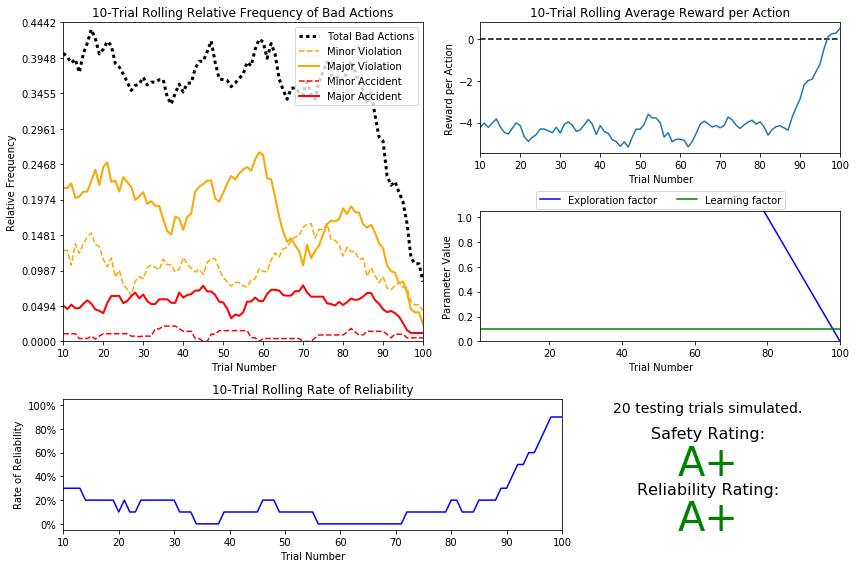

In [17]:
hide_code
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
# epsilon=5, alpha=0.1, tolerance=0.02
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

---
### Answer 7
- I have used the linear decay function for epsilon.

- The agent completed 100 training trials before testing, they became successful at the end of the training.

- I have used alpha=0.1 and epsilon-tolerance=0.05. The chosen epsilon-tolerance needs to have enough quantity of trials for training (at least not less than 96). The alpha-value was chosen not so small to give the agent more freedom in actions.
  
- The agent has a great progress in all spheres as a result of improvement was made with this Q-Learner when compared to the default Q-Learner. 
  - The reward became positive.
  - A significant reduction in bad actions of the agent was achieved.
  - The reliability had really improved till the grade of "A+"; the safety rating became equal to "A+"as well. Both indicators had reached their maximum values.
  
- The driving agent has successfully learned an appropriate policy: all testing trial had the positive results.

- I have completely satisfied with the safety and reliability ratings of the *Smartcab*: they have the highest possible level.

### 7.2 Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterward, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

---
### Answer 8
The most of the steps in the simulation correspond to the optimal policy and they are correct for the given state. In this case, the optimality can be described in the following way: the agent moving should be within the borders of the traffic rules, match the current situation on the road, reach the destination, and have a positive reward as a result.

Let's have a look at the concrete examples:

- &#x1F695; &nbsp; *`('right', 'red', None, None)`*
  - forward : -10.68
  - None : 0.61
  - right : 1.75
  - left : -10.39
- &#x1F58C; &nbsp; The waypoint is 'right', the light is 'red', and there are no cars near the Smartcab. In this case, the ideal action is 'right' has the highest positive weight (the agent can move to the goal), and the two most disruptive actions are severely penalized: any movement would be a violation.

- &#x1F695; &nbsp; *`('forward', 'green', 'forward', None)`*
  - forward : 1.02
  - None : -2.52
  - right : 0.17
  - left : 0.33
- &#x1F58C; &nbsp; The waypoint is 'forward', the light is 'green', there is a car from the oncoming direction, there are no cars from the left side. In this case, the ideal action is 'forward' has the highest positive weight (the agent can move to the goal), and the action 'None' is severely penalized: no move is a bad action.

Some actions do not look correct for the given state.

- &#x1F695; &nbsp; *`('forward', 'red', None, 'forward')`*
  - forward : -16.17
  - None : 0.51
  - right : -6.76
  - left : -16.46
- &#x1F58C; &nbsp; The waypoint is 'forward', the light is 'red', there are no cars from the oncoming direction, there is a car from the left side (moving forward). The action 'forward' could be classified as 'bad' and could be a reason for the accident.

---

---
##   $\mathfrak {\color{#348ABD} {8. \ Optional: \ Future \ Rewards \ - \ Discount \ Factor, \ `gamma`}}$
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backward from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: with all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics of the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

---
### Answer 9
